# San Jose Wages


In [1]:

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('sanjose2016.csv', header=None)


In [4]:
df.columns = df.iloc[0]



In [5]:
df = (df.drop(df.index[0]))


In [6]:
df.head()


,area_fips,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,annual_avg_estabs,annual_avg_emplvl,...,oty_total_annual_wages_chg,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_chg,oty_avg_annual_pay_pct_chg
1,C4194,0,10,40,0,2016,A,NaN,71282,1063091,...,8222842986,7.1,366498225,4.5,-4883344,-1.2,87,4.0,4552,4.1
2,C4194,1,10,41,0,2016,A,NaN,105,10062,...,19034842,2.1,0,0.0,0,0.0,22,1.2,1175,1.3
3,C4194,2,10,41,0,2016,A,NaN,223,5960,...,0,0,0,0,0,0,0,0,0,0
4,C4194,3,10,41,0,2016,A,NaN,1113,75434,...,0,0,0,0,0,0,0,0,0,0
5,C4194,5,10,41,0,2016,A,NaN,69841,971636,...,7823467658,7.1,365537711,4.5,-4918587,-1.2,91,4.1,4742,4.1


In [7]:
df1 = df[['industry_code','size_code', 'annual_avg_wkly_wage']]
df1 = df1[df1['annual_avg_wkly_wage'].astype(int) > 0 ]


In [8]:
#df2 = df1[(df1['industry_code'].str.match('102.+'))]
df2 = df1[(df1['industry_code'].str.match('^[1][1][0-9].*'))]   
df3 = df1[(df1['industry_code'].str.match('^[3][1-3][0-9].*'))]   



In [9]:
df1 = df[['industry_code','size_code', 'annual_avg_wkly_wage']]
df1 = df1[df1['annual_avg_wkly_wage'].astype(int) > 0 ]
import re
def code(val):
    if re.match('^[1][1][0-9].*', val['industry_code']):
        return "Farming"
    elif re.match('^[2][3][0-9].*', val['industry_code']):
        return "Construction"
    elif re.match('^[3][1-3][0-9].*', val['industry_code']):
        return "Manufacturing"
    elif re.match('^[4][2-5][0-9].*', val['industry_code']):
        return "Trade"
    elif re.match('^[5][1][0-9].*', val['industry_code']):
        return "Information"
    elif re.match('^[5][2][0-9].*', val['industry_code']):
        return "Finance"
    elif re.match('^[6][1][0-9].*', val['industry_code']):
        return "Education"
    
    elif re.match('^[6][2][0-9].*', val['industry_code']):
        return "HealthCare"
    elif re.match('^[5][4][0-9].*', val['industry_code']):
        return "Professional"
    else:
        return "Undefined"
 
df1['Code'] = df1.apply(code, axis = 1)
df1['Area'] = "San Jose"
df1 = df1[df1['Code'] != "Undefined"]
print(df1)

0    industry_code size_code annual_avg_wkly_wage          Code      Area
20             111         0                  789       Farming  San Jose
28            1112         0                  632       Farming  San Jose
29           11121         0                  632       Farming  San Jose
32            1113         0                 1063       Farming  San Jose
37           11133         0                 1072       Farming  San Jose
39          111332         0                  668       Farming  San Jose
42          111335         0                  744       Farming  San Jose
44          111339         0                 1580       Farming  San Jose
48          111419         0                  927       Farming  San Jose
51          111422         0                  922       Farming  San Jose
55           11199         0                  988       Farming  San Jose
56          111998         0                  988       Farming  San Jose
58            1121         0          

<IPython.core.display.Javascript object>


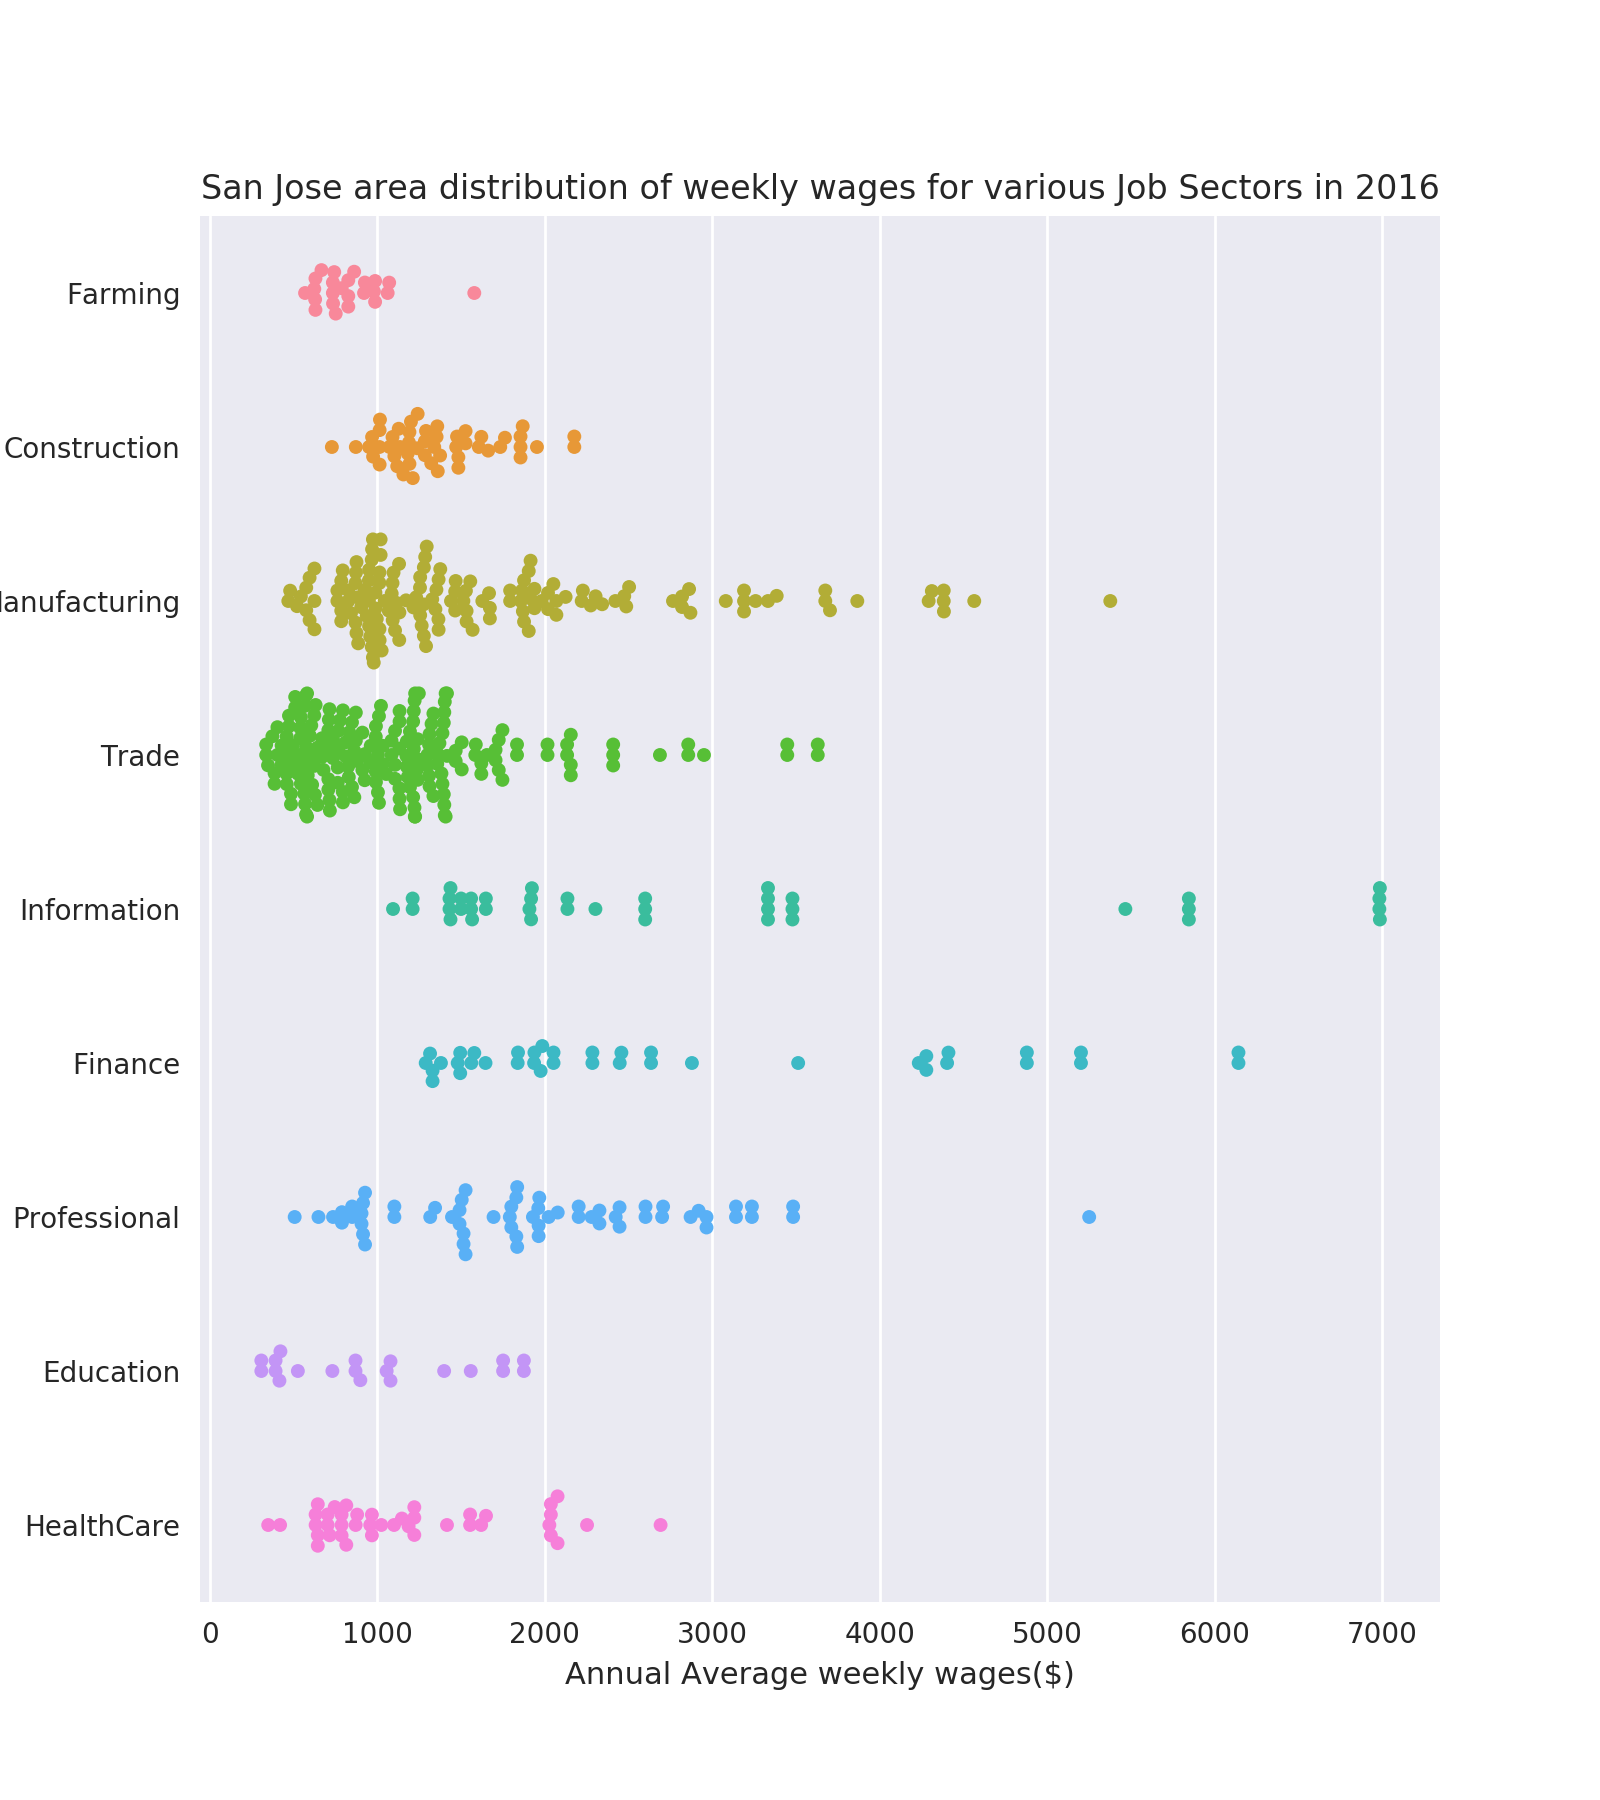

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
df1.head()
plt.figure(figsize=(8,9))
df1['annual_avg_wkly_wage'] = pd.to_numeric(df1['annual_avg_wkly_wage'])
sns.swarmplot('annual_avg_wkly_wage', 'Code', data=df1);
plt.xlabel('Annual Average weekly wages($)')

plt.title('San Jose area distribution of weekly wages for various Job Sectors in 2016')

